/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
  Embarked  Survived  Perished  Total
0                  2         0      2
1        C        93        75    168
2        Q        30        47     77
3        S       217       427    644


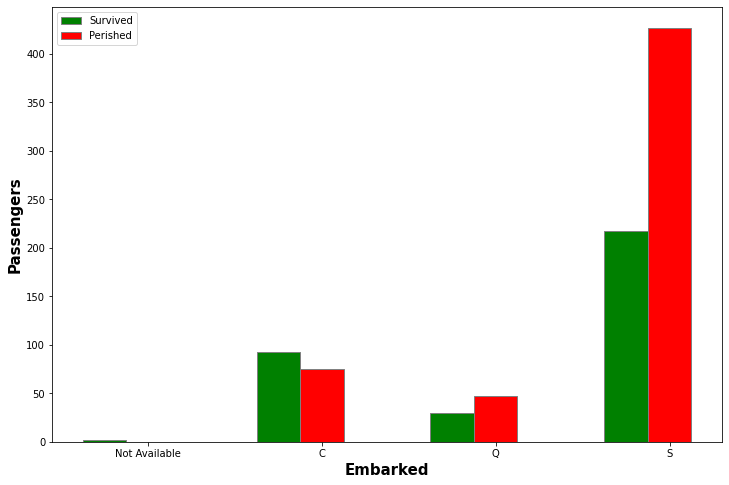

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

train = pd.read_csv("/kaggle/input/titanic/train.csv")
# printing the first 5 rows of dataset
train.head()

columns_train = list(train.columns)
columns_train
train.isnull().mean()

for column in columns_train:
    train[column] = train[column].fillna("")
    

df = pd.DataFrame(train)
ds = pd.DataFrame()

ds["Survived"] = df.groupby(["Embarked"])['Survived'].sum()
ds["Perished"] = df.groupby(["Embarked"])['Survived'].count() - df.groupby(["Embarked"])['Survived'].sum()
ds["Total"] = df.groupby(["Embarked"])['Survived'].count()

dx = ds.reset_index()

print(dx)

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(dx["Embarked"]))
br2 = [x + barWidth for x in br1]

plt.bar(br1, dx["Survived"], color ='g', width = barWidth,
        edgecolor ='grey', label ='Survived')
plt.bar(br2, dx["Perished"], color ='r', width = barWidth,
        edgecolor ='grey', label ='Perished')

plt.xlabel('Embarked', fontweight ='bold', fontsize = 15)
plt.ylabel('Passengers', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(dx["Embarked"]))],
        ['Not Available','C','Q','S'])

plt.legend()
plt.show()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session